In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read in data
raw = pd.read_csv("/content/drive/MyDrive/DS4H/covid_randomrowsa.csv")

In [5]:
raw.columns

Index(['Unnamed: 0', 'RecordDate', 'Duration_sec', 'Country', 'Language',
       'X.NA', 'X.NA.1', 'physical_contact__1', 'physical_contact__2',
       'physical_contact__3', 'physical_contact__4', 'physical_contact__5',
       'physical_hygiene__1', 'physical_hygiene__2', 'physical_hygiene__3',
       'physical_hygiene__4', 'physical_hygiene__5', 'policy_support__1',
       'policy_support__2', 'policy_support__3', 'policy_support__4',
       'policy_support__5', 'generosity__1', 'generosity__2', 'generosity__3',
       'SUM_GEN', 'psych_wellbeing1', 'psych_wellbeing2',
       'collective_narcis__1', 'collective_narcis__2', 'collective_narcis__3',
       'national_identity__1', 'national_identity__2',
       'Conspiracy_theories__1', 'Conspiracy_theories__2',
       'Conspiracy_theories__3', 'Conspiracy_theories__4',
       'open_mindedness__1', 'open_mindedness__2', 'open_mindedness__3',
       'open_mindedness__4', 'open_mindedness__5', 'open_mindedness__6',
       'morality_as_coop

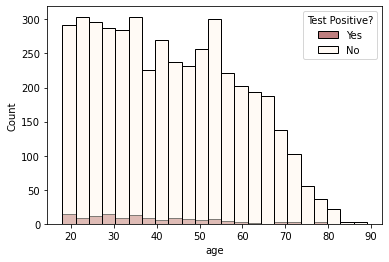

In [6]:
sns.histplot(data = raw, x = "age", hue = "tested_positive", palette = "OrRd")
plt.legend(['Yes', 'No'], title='Test Positive?')
plt.show()

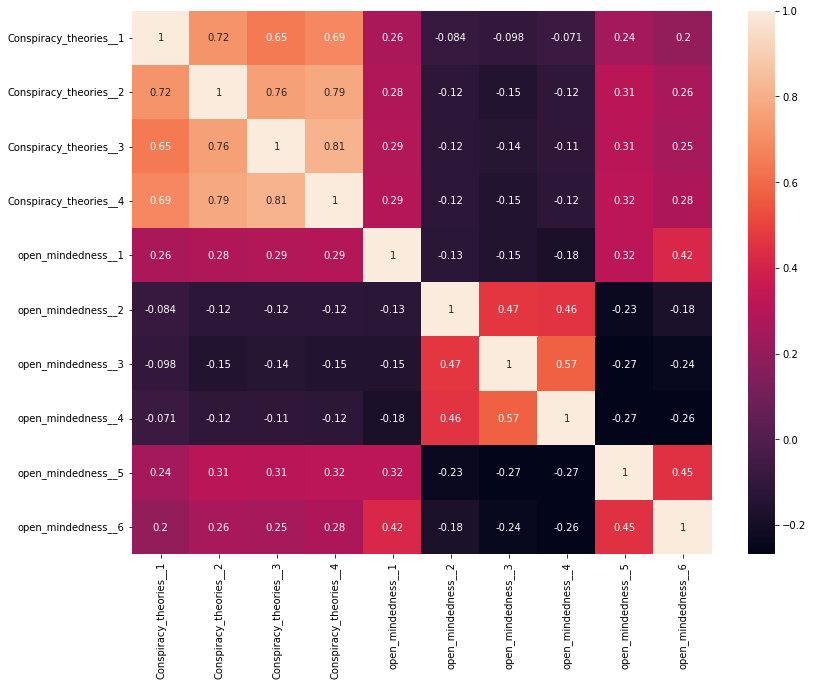

In [7]:
# Correlation between open mindedness and conspiracy theory
plt.figure(figsize=(13, 10))
sns.heatmap(raw.iloc[:,33:43].corr(), annot = True)
plt.show()

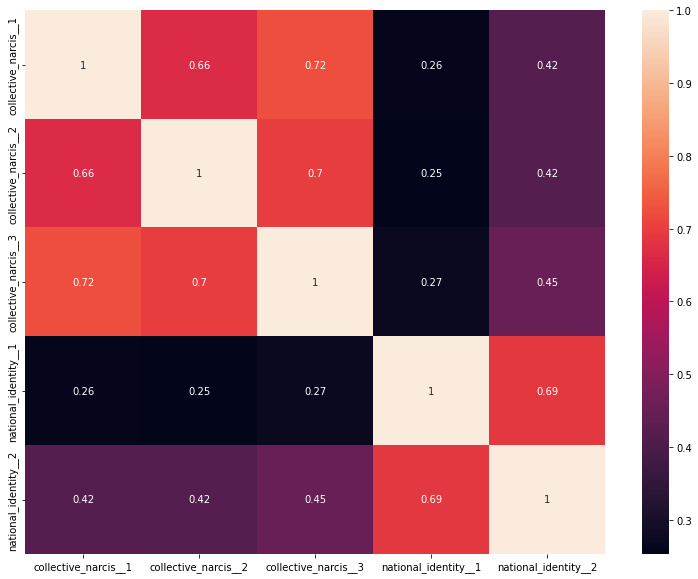

In [ ]:
# Correlation between open mindedness and conspiracy theory
plt.figure(figsize=(13, 10))
sns.heatmap(raw.iloc[:,28:33].corr(), annot = True)
plt.show()

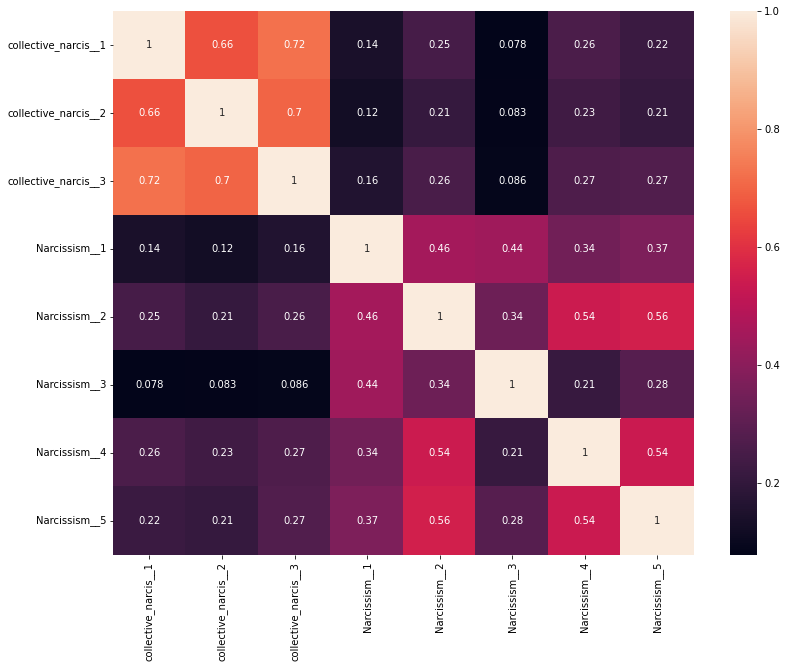

In [8]:
# Correlation between collective narsicism and narsicism:
plt.figure(figsize=(13, 10))
sns.heatmap(raw.iloc[:,np.r_[28:31, 61:66]].corr(), annot = True)
plt.show()

In [10]:
cty = raw.groupby("Country").mean()
new = cty.sort_values(by = "collective_narcis__3")
country = list(new.index)

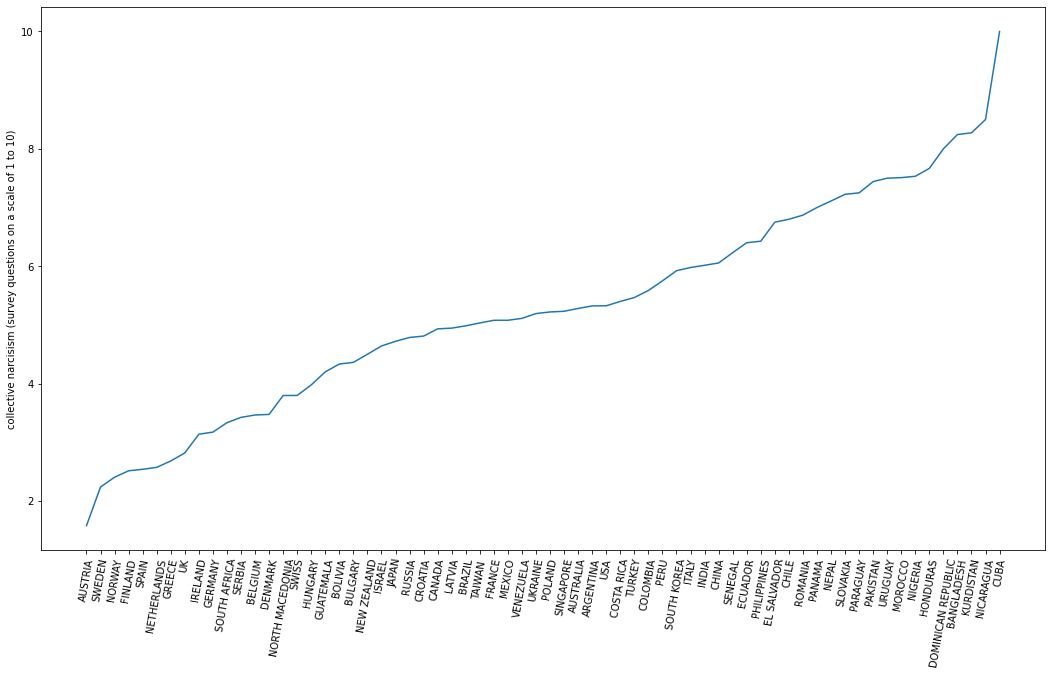

In [11]:
plt.figure(figsize=(18, 10))
sns.lineplot(x = country, y = new["collective_narcis__3"])
plt.xticks(rotation=80)
plt.ylabel("collective narcisism (survey questions on a scale of 1 to 10)")
#plt.title("collective narcisism ranked by countries and regions")
plt.show()

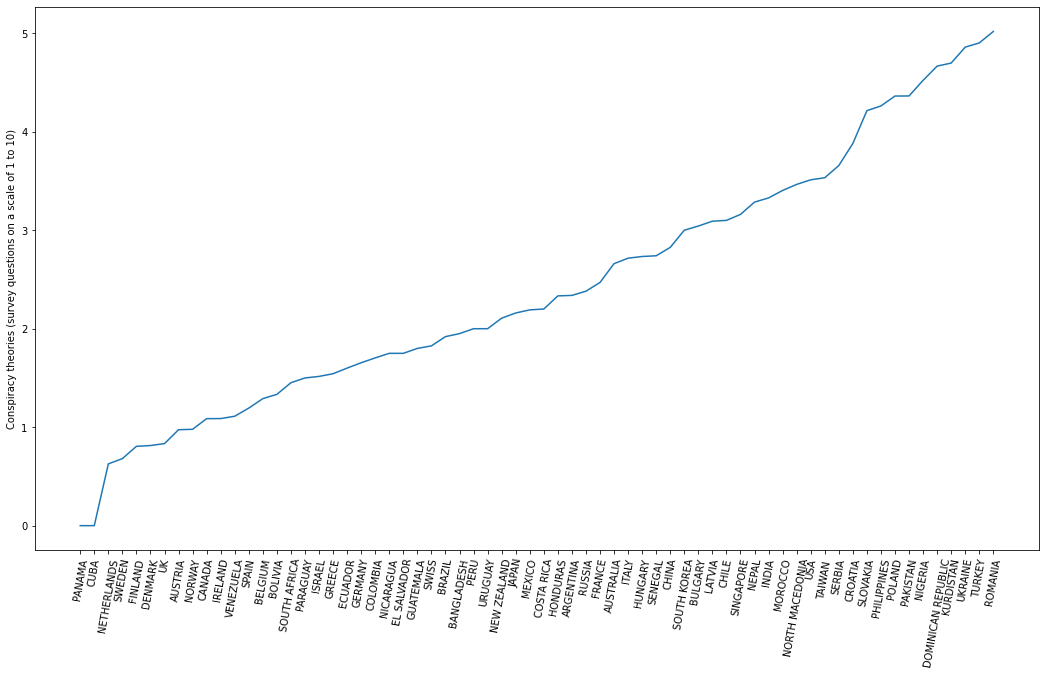

In [13]:
cty = raw.groupby("Country").mean()
new = cty.sort_values(by = "Conspiracy_theories__3")
country = list(new.index)
plt.figure(figsize=(18, 10))
sns.lineplot(x = country, y = new["Conspiracy_theories__3"])
plt.xticks(rotation=80)
plt.ylabel("Conspiracy theories (survey questions on a scale of 1 to 10)")
plt.show()

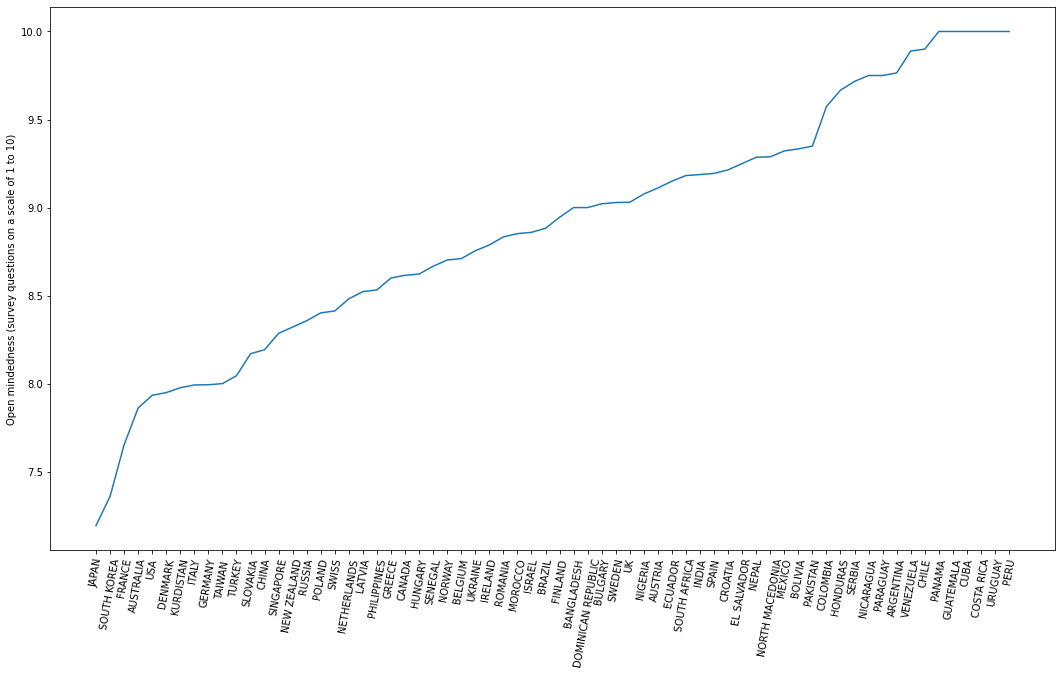

In [14]:
cty = raw.groupby("Country").mean()
new = cty.sort_values(by = "open_mindedness__4")
country = list(new.index)
plt.figure(figsize=(18, 10))
sns.lineplot(x = country, y = new["open_mindedness__4"])
plt.xticks(rotation=80)
plt.ylabel("Open mindedness (survey questions on a scale of 1 to 10)")
plt.show()

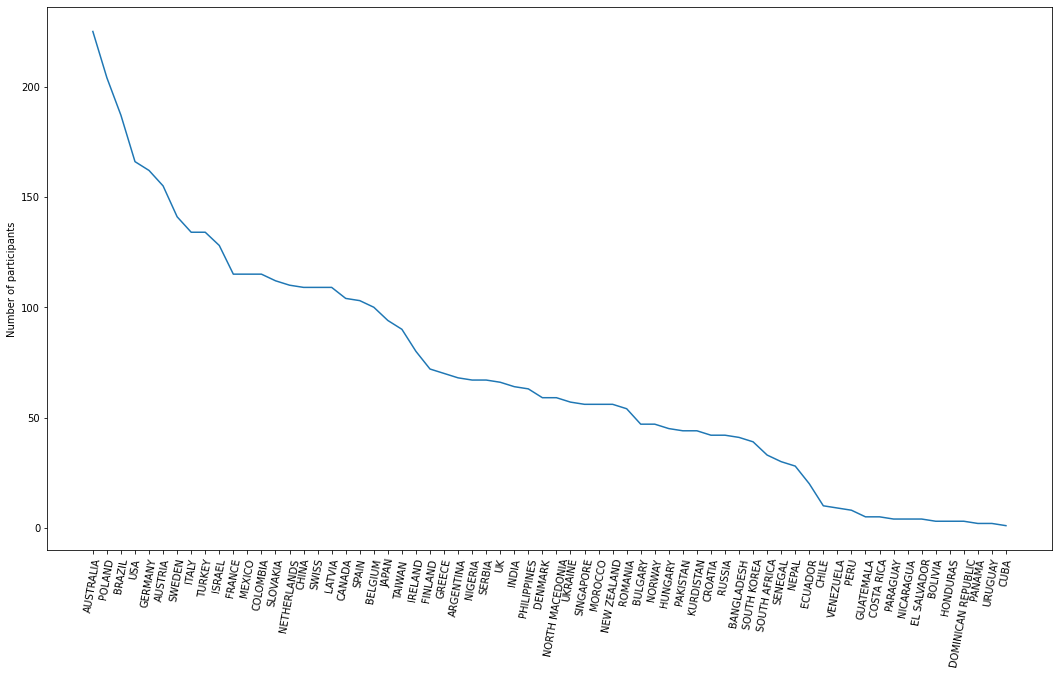

In [ ]:

plt.figure(figsize=(18, 10))
sns.lineplot(x = list(raw.value_counts("Country").index), y = raw.value_counts("Country"))
plt.xticks(rotation=80)
plt.ylabel("Number of participants")
plt.show()
